In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import glob
import os

In [3]:
# Folders

current_dir = os.getcwd()

input_cal_folder = os.path.abspath(os.path.join(current_dir, "..", "raw", "participant_data"))
input_eda_folder = os.path.abspath(os.path.join(current_dir, "..", "raw", "EDA_DATA/formatted_EDA_data"))
input_hr_folder = os.path.abspath(os.path.join(current_dir, "..", "raw", "Fit_files"))


In [4]:
# EDA Data 
eda_pattern = os.path.join(input_eda_folder, "participant*.txt")
eda_data = glob.glob(eda_pattern)
print(eda_data)


['/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant9.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant8.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant5.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant12.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant13.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant6.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant11.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant10.txt', '/Users/patrickkiehlmann/Desktop/python_test/diss_code/data/raw/EDA_DATA/formatted_EDA_data/participant7.tx

In [5]:
"""  
Calibration data 
This is stored as a dictionary of participants, that contains a meta dataframe, a raw dataframe, and a dictionary of calibration dataframes 

  'participantx': {
      'meta': <DataFrame of meta.csv>,
      'raw': <DataFrame of raw.csv>,
      'calibrations': {
          'calibration0': <DataFrame>,
          'calibration1': <DataFrame>,
          ...
      }
  },


"""
all_participants = os.path.join(input_cal_folder, "participant*") 
cal_folders = glob.glob(all_participants)


participants_data = {}

for folder_path in cal_folders:
    participant_id = os.path.basename(folder_path)

    meta_path = os.path.join(folder_path, "meta.csv")
    raw_path = os.path.join(folder_path, "raw.csv")
    
    calibration_files = glob.glob(os.path.join(folder_path, "calibration*.csv"))
    
    meta_df = pd.read_csv(meta_path, header=None, names=["timestamp", "partID", "age-range", "gender", "temperature", "hand_roughness"]) if os.path.exists(meta_path) else None
    raw_df = pd.read_csv(raw_path, header=None, names=["timestamp", "VOLT", "PW", "PWI", "PPB", "FREQ", "calibration_counter"]) if os.path.exists(raw_path) else None

    calibration_dfs = {}
    for cal_file in calibration_files:
        cal_name = os.path.splitext(os.path.basename(cal_file))[0]
        calibration_dfs[cal_name] = pd.read_csv(cal_file, header=None, names=["timestamp", "VOLT", "PW", "PWI", "PPB", "FREQ"])
    
    participants_data[participant_id] = {
        'meta': meta_df,
        'raw': raw_df,
        'calibrations': calibration_dfs
    }


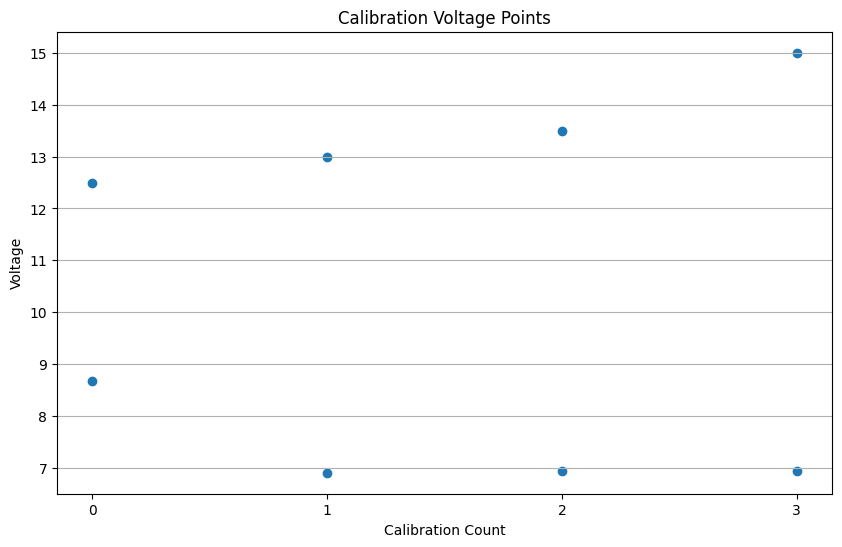

In [6]:
participant_data = participants_data['participant12']
calibrations = participant_data.get('calibrations', {})

calib_counts = []
volt_values = []

for cal_name, df in calibrations.items():
    try:
        calib_count = int(cal_name.replace("calibration", ""))
    except ValueError:
        continue

    for voltage in df["VOLT"]:
        calib_counts.append(calib_count)
        volt_values.append(voltage)

plt.figure(figsize=(10, 6))
plt.scatter(calib_counts, volt_values)
plt.xlabel("Calibration Count")
plt.ylabel("Voltage")
plt.title("Calibration Voltage Points")
plt.xticks(range(min(calib_counts), max(calib_counts) + 1))
plt.grid(True, axis='y')
plt.show()

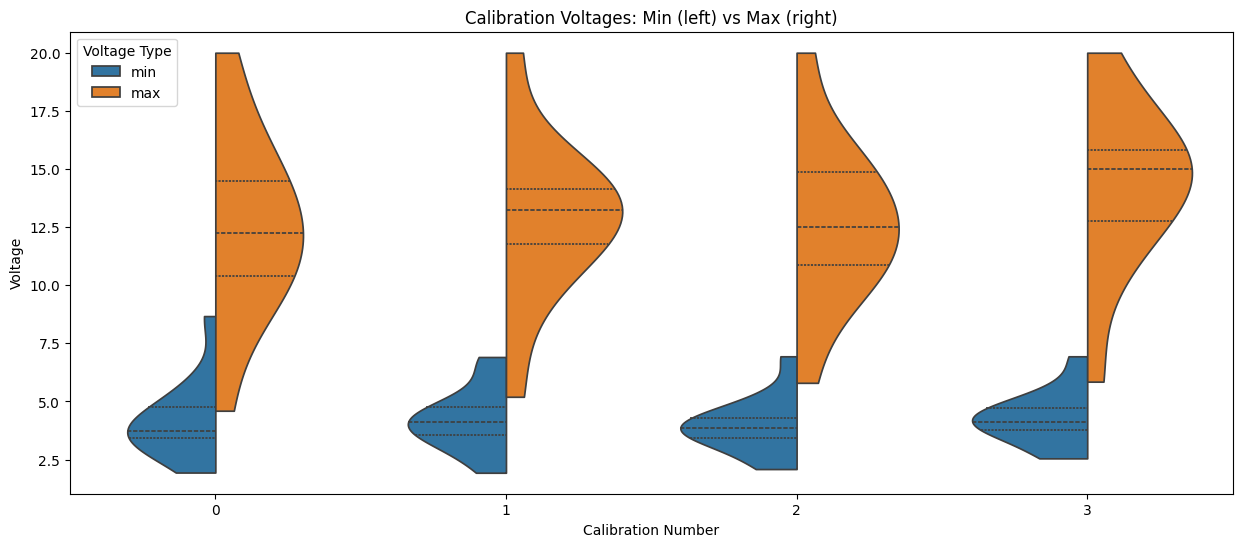

In [7]:
data_rows = []

for participant, pdata in participants_data.items():
    calibrations = pdata.get('calibrations')
    if not calibrations:
        continue
    for cal_name, cal_df in calibrations.items():
        if len(cal_df) < 2:
            continue
        min_val = cal_df.iloc[0]['VOLT']
        max_val = cal_df.iloc[1]['VOLT']
        cal_num = int(cal_name.replace("calibration", ""))
        
        data_rows.append({'participant': participant, 'calibration': cal_num, 'voltage_type': 'min', 'VOLT': min_val})
        data_rows.append({'participant': participant, 'calibration': cal_num, 'voltage_type': 'max', 'VOLT': max_val})

df_calib = pd.DataFrame(data_rows)

plt.figure(figsize=(15, 6))
sns.violinplot(x='calibration', y='VOLT', hue='voltage_type', data=df_calib, split=True, inner="quart", cut=0) #stops the graph showing the KDE formula, remove cut=0 to include this
plt.xlabel("Calibration Number")
plt.ylabel("Voltage")
plt.title("Calibration Voltages: Min (left) vs Max (right)")
plt.legend(title='Voltage Type')
plt.show()

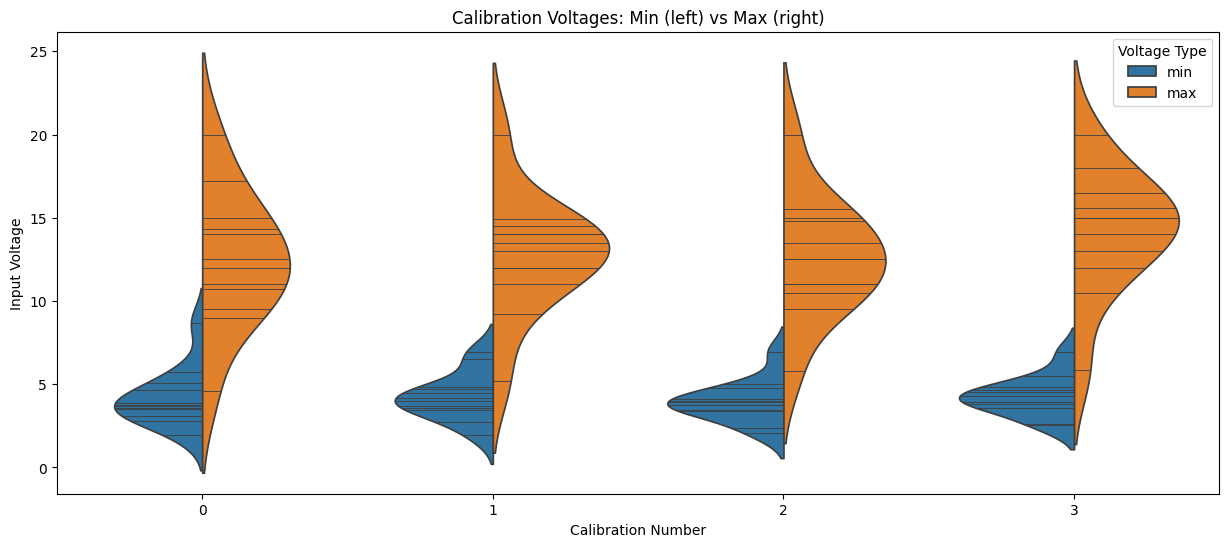

In [8]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='calibration', y='VOLT', hue='voltage_type', data=df_calib, split=True, inner="stick") 
plt.xlabel("Calibration Number")
plt.ylabel("Input Voltage")
plt.title("Calibration Voltages: Min (left) vs Max (right)")
plt.legend(title='Voltage Type')
plt.show()

/var/folders/sx/2dh9pxh144d_gh7jl6j_d1tr0000gn/T/ipykernel_42955/1862641248.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.swarmplot(


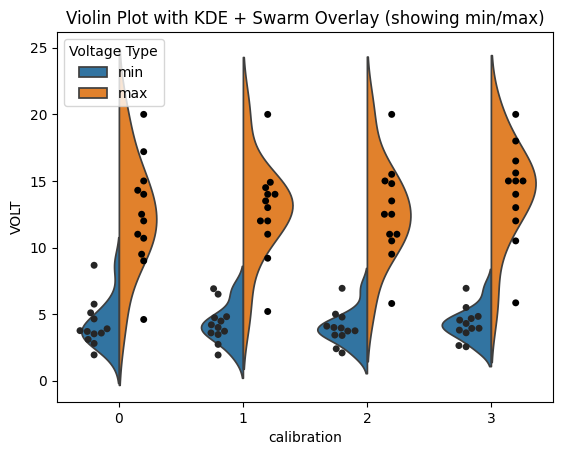

In [9]:
violin_plot = sns.violinplot(
    x='calibration', 
    y='VOLT', 
    hue='voltage_type', 
    data=df_calib, 
    split=True, 
    cut=2,   
    inner=None   
)

sns.swarmplot(
    x='calibration', 
    y='VOLT', 
    hue='voltage_type', 
    data=df_calib, 
    dodge=True,   
    color='k', 
    ax=violin_plot
)

handles, labels = violin_plot.get_legend_handles_labels()
violin_plot.legend(handles[:2], labels[:2], title='Voltage Type', loc='upper left')

plt.title("Violin Plot with KDE + Swarm Overlay (showing min/max)")
plt.show()

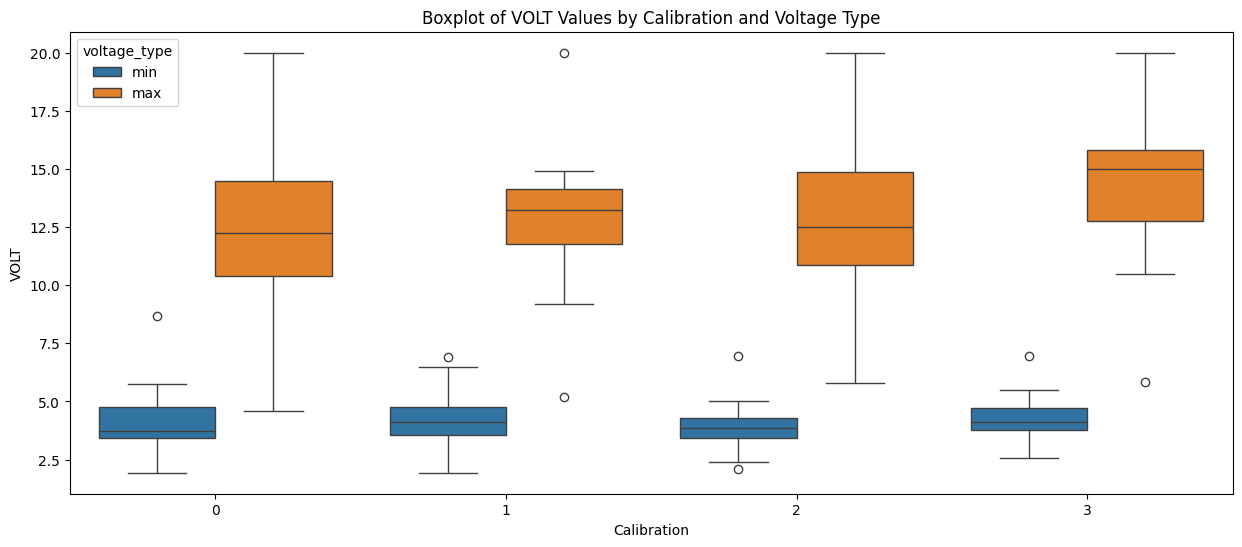

                            min    max       mean       std       q1      q3
calibration voltage_type                                                    
0           max           4.600  20.00  12.483333  4.039314  10.4000  14.475
            min           1.940   8.67   4.205000  1.733223   3.4150   4.755
1           max           5.200  20.00  12.775000  3.539164  11.7500  14.125
            min           1.932   6.91   4.256000  1.408029   3.5600   4.750
2           max           5.800  20.00  12.633333  3.567106  10.8750  14.850
            min           2.090   6.94   3.965000  1.253261   3.4225   4.270
3           max           5.850  20.00  14.204167  3.655411  12.7500  15.825
            min           2.550   6.94   4.270833  1.194848   3.7500   4.710


In [10]:
df_calib = pd.DataFrame(data_rows)

plt.figure(figsize=(15, 6))
sns.boxplot(x='calibration', y='VOLT', hue='voltage_type', data=df_calib)
plt.title("Boxplot of VOLT Values by Calibration and Voltage Type")
plt.xlabel("Calibration")
plt.ylabel("VOLT")
plt.show()

df_calib_calculated = df_calib.groupby(['calibration', 'voltage_type'])['VOLT'].agg(min='min',max='max', mean='mean', std='std', q1=lambda x: x.quantile(0.25), q3=lambda x: x.quantile(0.75))
print(df_calib_calculated)



In [11]:
output_folder = os.path.abspath(os.path.join(current_dir, "..", "processed", "graphs_EDA_time"))

sample_rate = 10
for file in eda_data:
    eda_df = pd.read_csv(file, header=None, names=["timestamp", "EDA"])
    data = eda_df["EDA"]
    print(data.max())
    num_samples = len(data)
    
    time = np.arange(num_samples) / sample_rate
    time_min = time / 60.0
    base_name = os.path.basename(file)

    plt.figure(figsize=(20, 6))
    plt.plot(time_min, data, label='Sensor Reading')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Sensor Value in MicroSeivens (uS)')
    plt.title(f'EDA measurements over time for {base_name}')
    plt.xlim(0, time_min[-1])
    plt.ylim(0, 30)
    plt.tight_layout()
    plt.legend()

    EDA_graph = base_name.replace(".txt", ".png")
    output_graph = os.path.join(output_folder, EDA_graph)
    plt.savefig(output_graph)
    plt.close()

17.40234375
18.28857421875
23.55224609375
9.5068359375
11.9775390625
27.392578125
18.6376953125
27.392578125
27.392578125
23.01513671875
14.82421875


In [12]:
df_min = df_calib[df_calib['voltage_type'] == 'min'].copy()
df_max = df_calib[df_calib['voltage_type'] == 'max'].copy()

df_min = df_min.sort_values(['participant', 'calibration'])
df_max = df_max.sort_values(['participant', 'calibration'])

df_min['perc_change'] = df_min.groupby('participant')['VOLT'].pct_change() * 100
df_max['perc_change'] = df_max.groupby('participant')['VOLT'].pct_change() * 100

df_min_max_percent = pd.merge(df_min, df_max, on=['participant', 'calibration'], suffixes=('_min', '_max'))

df_min_max_percent = df_min_max_percent[["participant", "calibration","perc_change_min", "perc_change_max"]]
df_min_max_percent.fillna(0, inplace=True)

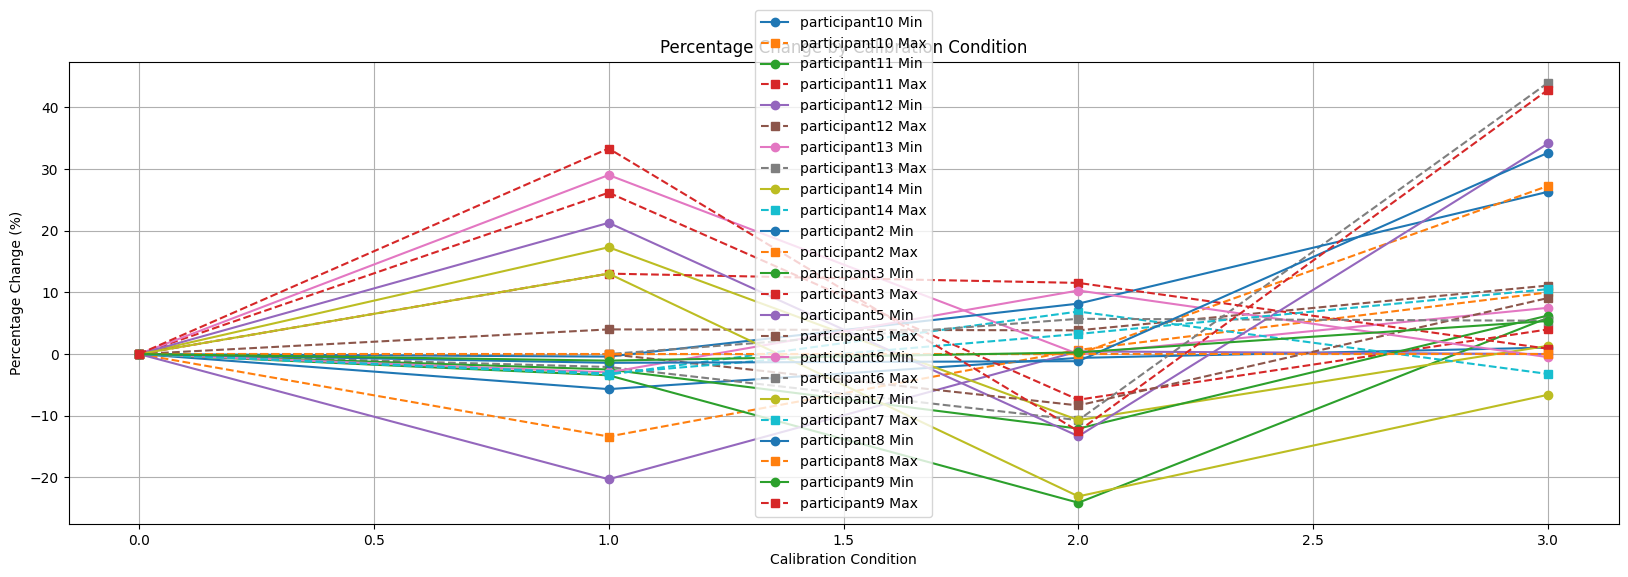

In [13]:
participants = df_min_max_percent['participant'].unique()
plt.figure(figsize=(20, 6))

for participant in participants:
    df_part = df_min_max_percent[df_min_max_percent['participant'] == participant]
    plt.plot(df_part['calibration'], df_part['perc_change_min'], 
             marker='o', linestyle='-', label=f"{participant} Min")
    plt.plot(df_part['calibration'], df_part['perc_change_max'], 
             marker='s', linestyle='--', label=f"{participant} Max")

plt.xlabel("Calibration Condition")
plt.ylabel("Percentage Change (%)")
plt.title("Percentage Change by Calibration Condition")
plt.legend()
plt.grid(True)
plt.show()

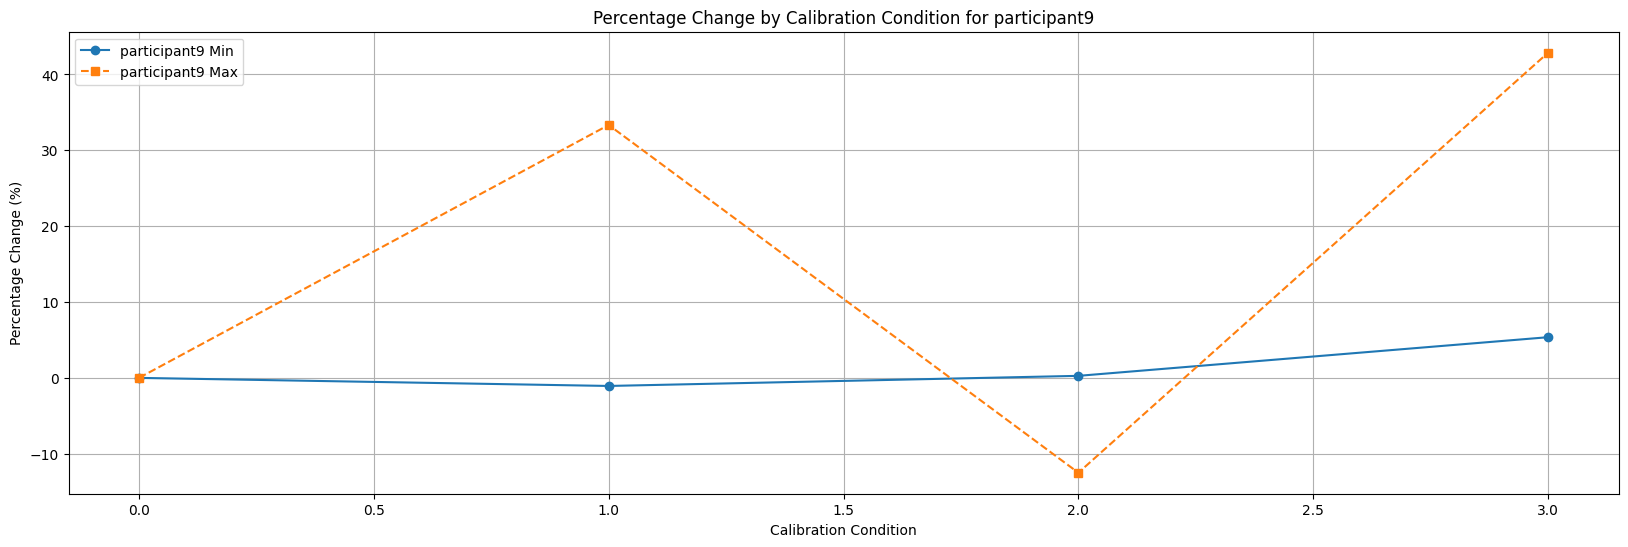

In [14]:
def plot_percentage_change(participant):
    plt.figure(figsize=(20, 6))
    df_part = df_min_max_percent[df_min_max_percent['participant'] == participant]
    plt.plot(df_part['calibration'], df_part['perc_change_min'], 
             marker='o', linestyle='-', label=f"{participant} Min")
    plt.plot(df_part['calibration'], df_part['perc_change_max'], 
             marker='s', linestyle='--', label=f"{participant} Max")
    plt.xlabel("Calibration Condition")
    plt.ylabel("Percentage Change (%)")
    plt.title(f"Percentage Change by Calibration Condition for {participant}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_percentage_change('participant9')

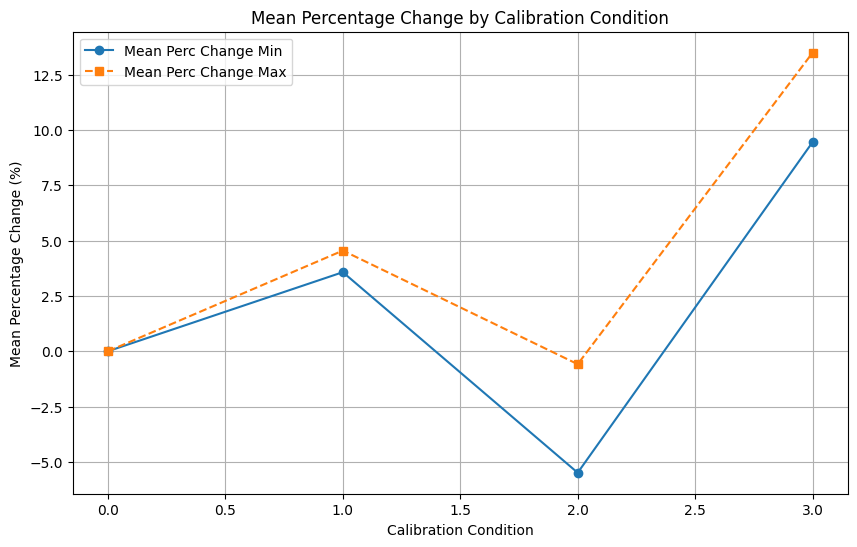

In [15]:
df_percent_mean = df_min_max_percent.groupby('calibration', as_index=False).mean(numeric_only=True)
plt.figure(figsize=(10, 6))
plt.plot(df_percent_mean['calibration'], df_percent_mean['perc_change_min'], 
         marker='o', linestyle='-', label='Mean Perc Change Min')
plt.plot(df_percent_mean['calibration'], df_percent_mean['perc_change_max'], 
         marker='s', linestyle='--', label='Mean Perc Change Max')

plt.xlabel("Calibration Condition")
plt.ylabel("Mean Percentage Change (%)")
plt.title("Mean Percentage Change by Calibration Condition")
plt.legend()
plt.grid(True)
plt.show()

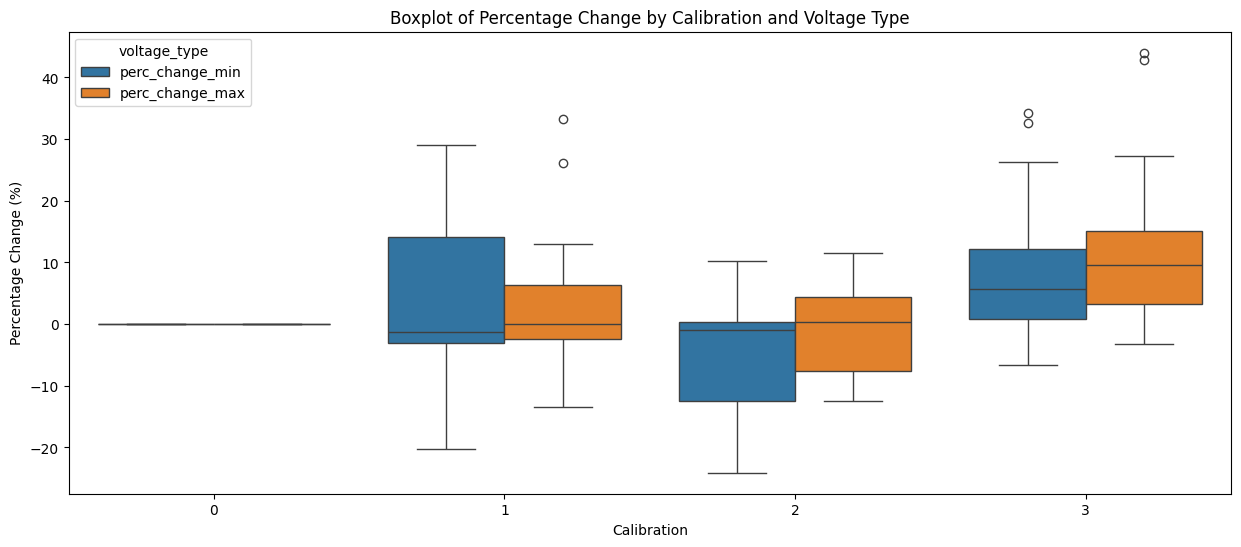

   calibration     voltage_type       mean    median        std        min  \
0            0  perc_change_max   0.000000  0.000000   0.000000   0.000000   
1            0  perc_change_min   0.000000  0.000000   0.000000   0.000000   
2            1  perc_change_max   4.548651  0.000000  13.273467 -13.372093   
3            1  perc_change_min   3.572680 -1.242142  13.775497 -20.299885   
4            2  perc_change_max  -0.585630  0.335570   7.570713 -12.500000   
5            2  perc_change_min  -5.491209 -0.888219  11.140650 -24.107143   
6            3  perc_change_max  13.491656  9.545455  15.970174  -3.225806   
7            3  perc_change_min   9.448649  5.622142  13.680591  -6.600000   

         max  
0   0.000000  
1   0.000000  
2  33.333333  
3  29.032258  
4  11.538462  
5  10.306407  
6  44.000000  
7  34.146341  


In [16]:
df_melted = pd.melt(df_min_max_percent, 
                    id_vars=['participant', 'calibration'],
                    value_vars=['perc_change_min', 'perc_change_max'],
                    var_name='voltage_type',
                    value_name='perc_change')

plt.figure(figsize=(15, 6))
sns.boxplot(x='calibration', y='perc_change', hue='voltage_type', data=df_melted)
plt.title("Boxplot of Percentage Change by Calibration and Voltage Type")
plt.xlabel("Calibration")
plt.ylabel("Percentage Change (%)")
plt.show()


df_summary = df_melted.groupby(['calibration','voltage_type'])['perc_change'] \
                       .agg(['mean','median','std','min','max']) \
                       .reset_index()
print(df_summary)

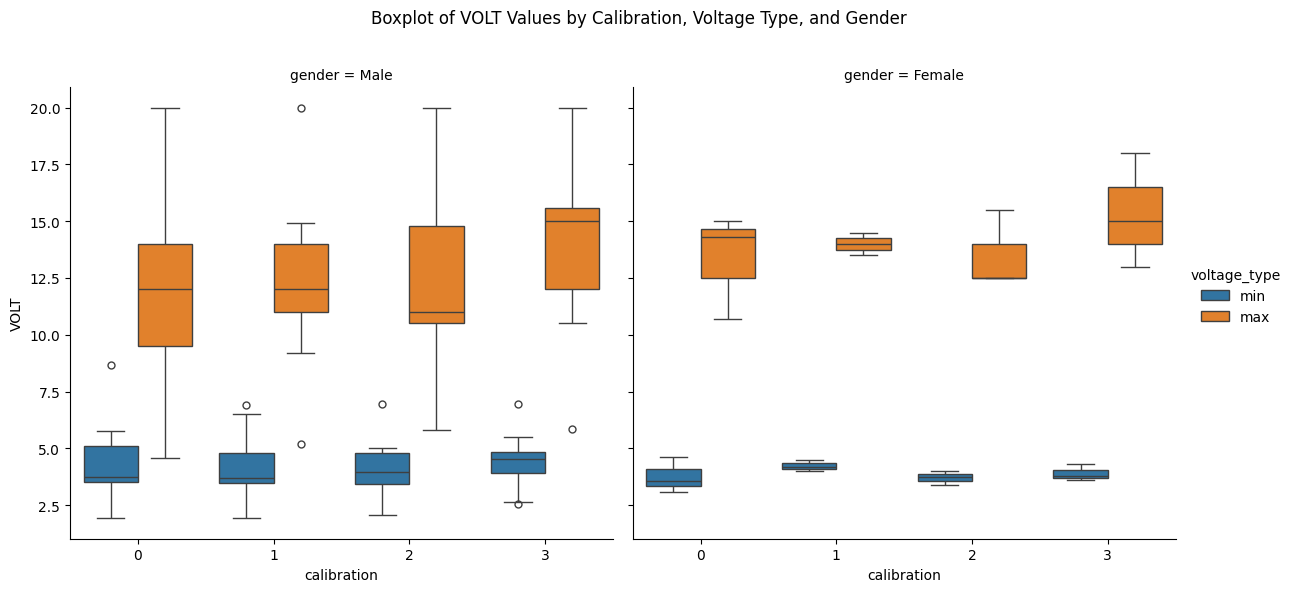

In [17]:
# Comparing men and woman (8 vs 3)

data_rows_MW = []

for participant, pdata in participants_data.items():
    meta_df = pdata.get('meta')
    if meta_df is None or meta_df.empty:
        continue
    gender = meta_df.iloc[0]['gender']
    calibrations = pdata.get('calibrations')
    if not calibrations:
        continue
    for cal_name, cal_df in calibrations.items():
        min_val = cal_df.iloc[0]['VOLT']
        max_val = cal_df.iloc[1]['VOLT']
        cal_num = int(cal_name.replace("calibration", ""))

        data_rows_MW.append({'participant': participant, 'gender': gender, 'calibration': cal_num, 'voltage_type': 'min', 'VOLT': min_val})
        data_rows_MW.append({'participant': participant, 'gender': gender, 'calibration': cal_num, 'voltage_type': 'max', 'VOLT': max_val})


df_MW = pd.DataFrame(data_rows_MW)
sns.catplot(
    data=df_MW,
    x='calibration',
    y='VOLT',
    hue='voltage_type',
    col='gender',
    kind='box',
    height=6,
    aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Boxplot of VOLT Values by Calibration, Voltage Type, and Gender")
plt.show()


In [18]:
stats = df_MW.groupby(['gender', 'calibration', 'voltage_type'])['VOLT'].agg(['min', 'mean', 'max'])
print(stats)


                                    min       mean    max
gender calibration voltage_type                          
Female 0           max           10.700  13.333333  15.00
                   min            3.100   3.773333   4.64
       1           max           13.500  14.000000  14.50
                   min            4.000   4.226667   4.48
       2           max           12.500  13.500000  15.50
                   min            3.400   3.716667   4.00
       3           max           13.000  15.333333  18.00
                   min            3.600   3.900000   4.30
Male   0           max            4.600  12.200000  20.00
                   min            1.940   4.348889   8.67
       1           max            5.200  12.366667  20.00
                   min            1.932   4.265778   6.91
       2           max            5.800  12.344444  20.00
                   min            2.090   4.047778   6.94
       3           max            5.850  13.827778  20.00
              